## Monta o armazenamento do Google Drive

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Conecta com o banco SQLite

In [ ]:
import sqlite3

conn = sqlite3.connect('//content/drive/MyDrive/Datasets/DataWarehouse.db')
cursor = conn.cursor()

### Verifica todas as tabelas

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

all_tables = []

for table in tables:
  all_tables.append(table[0])


print(all_tables)

['estado', 'tempo', 'usuario', 'produto', 't_fact']


## Funções de gráficos

In [ ]:
def plot_bar_chart(x_column, y_column, dataframe, title):
  plt.figure(figsize=(10, 6))
  bars = plt.bar(df[x_column], df[y_column])
  plt.bar(df[x_column], df[y_column])
  plt.title(title)
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.xticks(rotation=45)  # Rotate x-axis labels for readability
  for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',  # Display height with two decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')
  plt.show()


def bar_plot(size, x_column, y_column, dataframe, title):
  plt.figure(figsize=size)
  bars = plt.bar(df[x_column], df[y_column])
  sns.barplot(data=dataframe, x=x_column, y=y_column)
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(title)
  plt.xticks(rotation=45)
  for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',  # Display height with two decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')
  plt.tight_layout()
  plt.show()

### Testa os valores das tabelas

In [ ]:
def get_column_names(cursor, table_name):
  cursor.execute(f"PRAGMA table_info({table_name})")
  columns_info = cursor.fetchall()
  column_names = [column[1] for column in columns_info]
  column_string = ', '.join(column_names)
  return f"({column_string})"


def display_table(cursor, table_name, max_rows):
  print(get_column_names(cursor, table_name))
  cursor.execute(f"SELECT * FROM {table_name} LIMIT {max_rows}")
  rows = cursor.fetchall()
  for row in rows:
    print(row)


display_table(cursor, table_name='t_fact', max_rows=30)

print('\n\n')

display_table(cursor, table_name='tempo', max_rows=30)

(id, avaliacao, recomenda, estado_name, tempo_id, usuario_id, produto_id)
(1, 4, 'Yes', 'SP', 1, '44f2c8edd93471926fff601274b8b2b5c4824e386ae4f210329b9b71890277fd', 113022329)
(2, 4, 'Yes', 'SP', 2, 'ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863f165ffedb1e8147984', 113851581)
(3, 5, 'Yes', 'MG', 3, '7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e72bce7e88850efa0fc', 131788803)
(4, 5, 'Yes', 'SP', 4, 'a0fd1ad35b08d3b764ad6f884ef7183bf29fc7ebfcae65964d7e9c200e3c9335', 122776350)
(5, 5, 'Yes', 'RJ', 5, '74cfe73e7489f0ed1f4d1f012efbc5a8e0958c3559b65d4630f59ab9fce9a17e', 126474851)
(6, 3, 'Yes', 'PE', 6, 'b6a96310f5f1273a16b798b0d514c740bb96dc85ad93da237f0a11b7d6361250', 125768030)
(7, 5, 'Yes', 'RJ', 7, 'c6bff459531c9c383e472464f4aee69c2f59a90e62b43e5ff4c2029bdb64477d', 113048617)
(8, 1, 'No', 'SP', 8, 'a687ca330b372a7ab49d2875f2957e8281b4ec6ad8f1885452b9ff34c526645d', 125061667)
(9, 4, 'Yes', 'RS', 9, 'fc68d68b0a1aafe63d7607f5f26e06a0254587daf36b7b91ad9c00dd4e3301ff', 126030651)
(10, 4, '

## Visualizações

### Compara a média de avaliação entre diferentes atributos

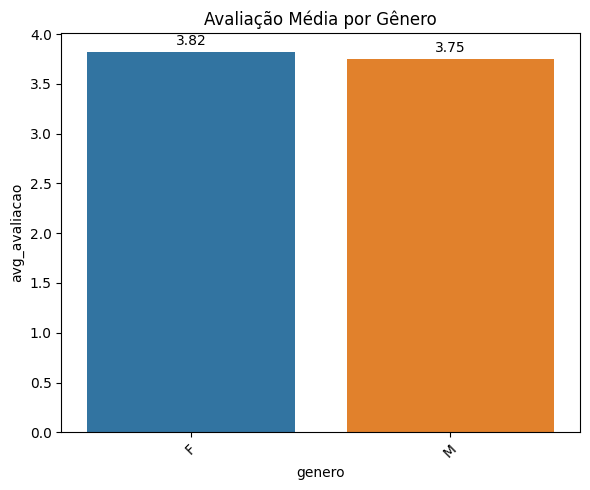

In [ ]:
query = """
SELECT usuario.genero, AVG(t_fact.avaliacao) AS avg_avaliacao
FROM t_fact
JOIN usuario ON t_fact.usuario_id = usuario.id
GROUP BY usuario.genero
"""

df = pd.read_sql_query(query, conn)
df = df.sort_values(by='genero')

bar_plot(size=(6, 5), x_column='genero', y_column='avg_avaliacao', dataframe=df, title='Avaliação Média por Gênero')

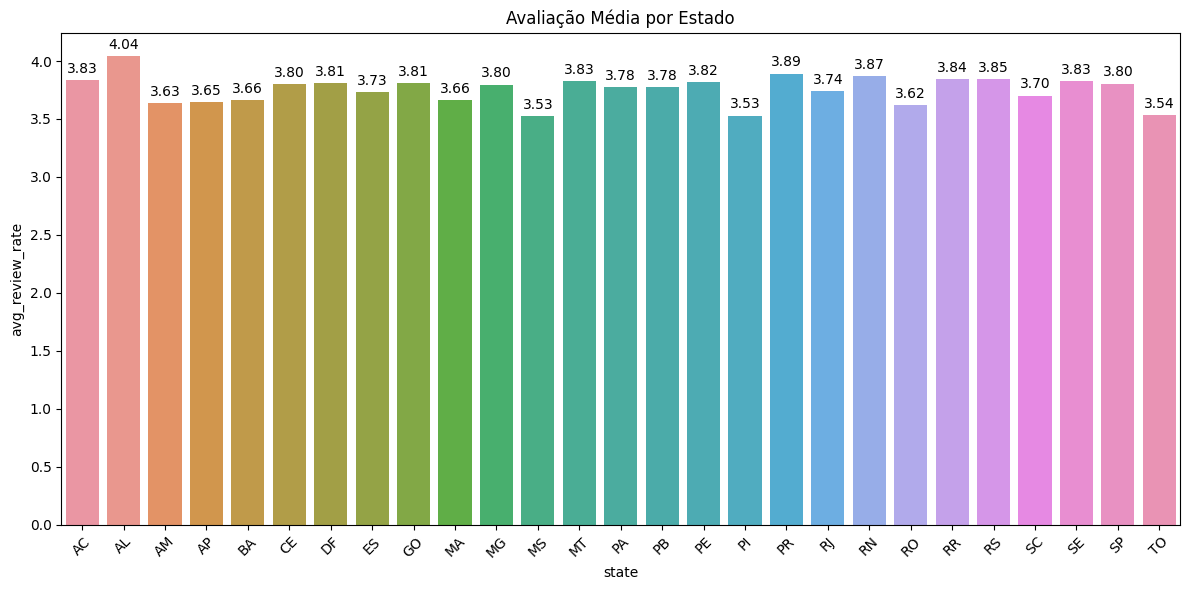

In [ ]:
query = """
    SELECT e.name AS state, AVG(tf.avaliacao) AS avg_review_rate
    FROM estado e
    INNER JOIN t_fact tf ON e.name = tf.estado_name
    GROUP BY e.name
"""

df = pd.read_sql_query(query, conn)

bar_plot(size=(12, 6), x_column='state', y_column='avg_review_rate', dataframe=df, title='Avaliação Média por Estado')

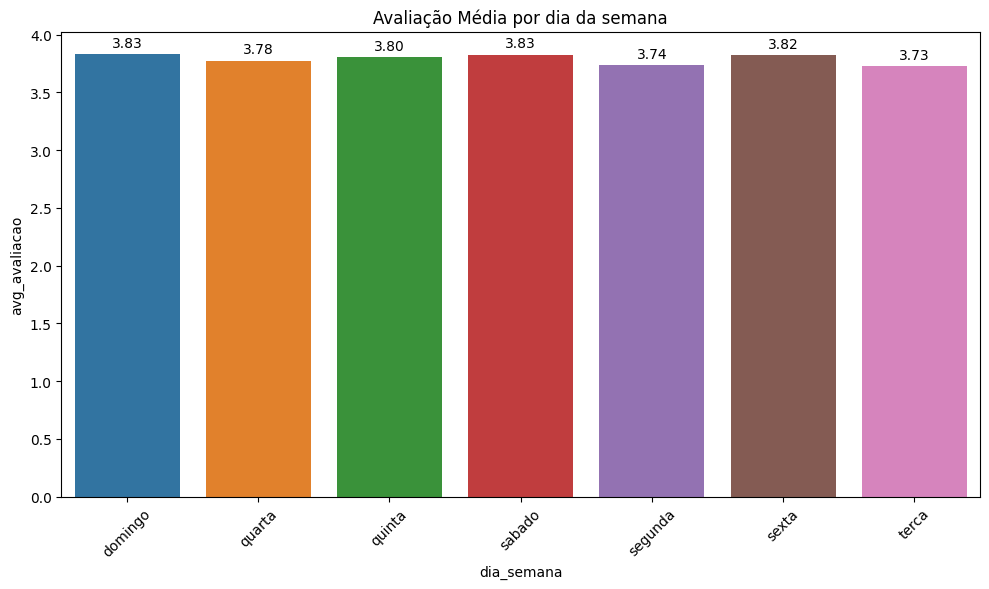

In [ ]:
query = """
SELECT tempo.dia_semana, AVG(t_fact.avaliacao) AS avg_avaliacao
FROM t_fact
JOIN tempo ON t_fact.tempo_id = tempo.id
GROUP BY tempo.dia_semana
"""

df = pd.read_sql_query(query, conn)

bar_plot(size=(10, 6), x_column='dia_semana', y_column='avg_avaliacao', dataframe=df, title='Avaliação Média por dia da semana')

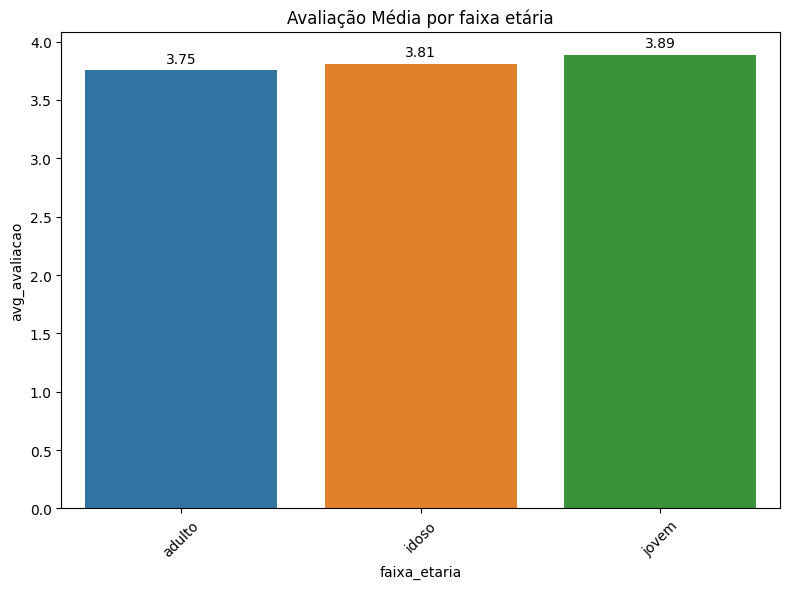

In [ ]:
query = """
SELECT usuario.faixa_etaria, AVG(t_fact.avaliacao) AS avg_avaliacao
FROM t_fact
JOIN usuario ON t_fact.usuario_id = usuario.id
GROUP BY usuario.faixa_etaria
"""

df = pd.read_sql_query(query, conn)
df = df.sort_values(by='faixa_etaria')

bar_plot(size=(8, 6), x_column='faixa_etaria', y_column='avg_avaliacao', dataframe=df, title='Avaliação Média por faixa etária')

### Distribuições nas avaliações

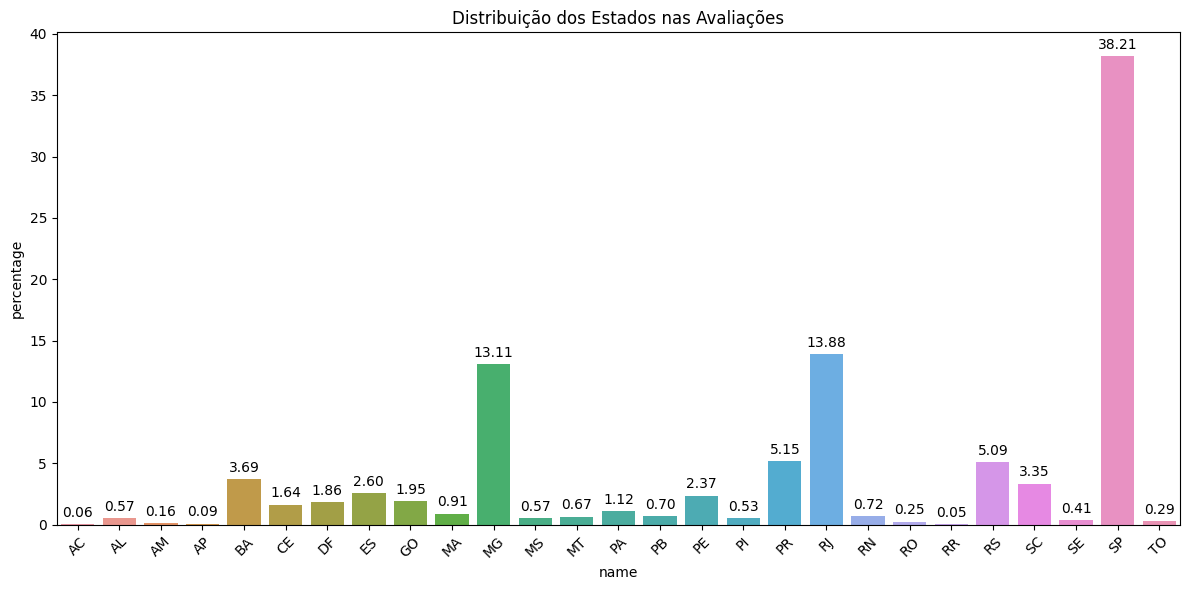

In [ ]:
query = """
SELECT estado.name, (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM t_fact)) as percentage
FROM t_fact
INNER JOIN estado ON t_fact.estado_name = estado.name
GROUP BY estado.name
"""

df = pd.read_sql_query(query, conn)

bar_plot(size=(12, 6), x_column='name', y_column='percentage', dataframe=df, title='Distribuição dos Estados nas Avaliações')

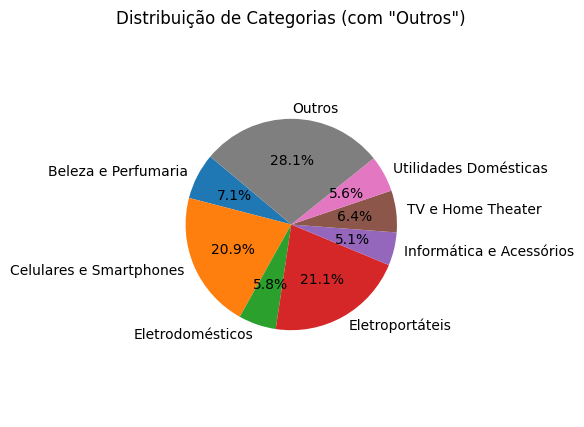

In [ ]:
query = """
SELECT produto.categoria, COUNT(*) as count
FROM t_fact
INNER JOIN produto ON t_fact.produto_id = produto.id
GROUP BY produto.categoria
"""

df = pd.read_sql_query(query, conn)

threshold = 0.05  # You can adjust this threshold

small_categories = df[df['count'] / df['count'].sum() < threshold]
if not small_categories.empty:
    outros_count = small_categories['count'].sum()
    df = df[~df['categoria'].isin(small_categories['categoria'])]
    # df = df.append({'categoria': 'Outros', 'count': outros_count}, ignore_index=True)
    outros_df = pd.DataFrame({'categoria': ['Outros'], 'count': [outros_count]})
    df = pd.concat([df, outros_df], ignore_index=True)

plt.figure(figsize=(3, 5))
plt.pie(df['count'], labels=df['categoria'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de categorias mais avaliadas')
plt.show()

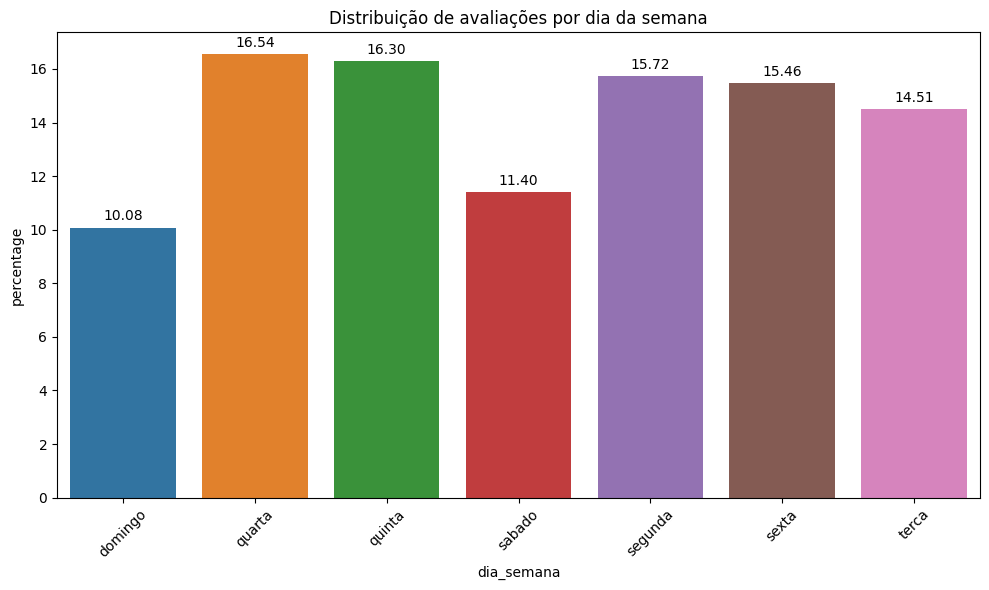

In [ ]:
query = """
SELECT tempo.dia_semana, (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM t_fact)) as percentage
FROM t_fact
JOIN tempo ON t_fact.tempo_id = tempo.id
GROUP BY tempo.dia_semana
"""

df = pd.read_sql_query(query, conn)
df = df.sort_values(by='dia_semana')

bar_plot(size=(10, 6), x_column='dia_semana', y_column='percentage', dataframe=df, title='Distribuição de avaliações por dia da semana')

### Categorias mais avaliadas

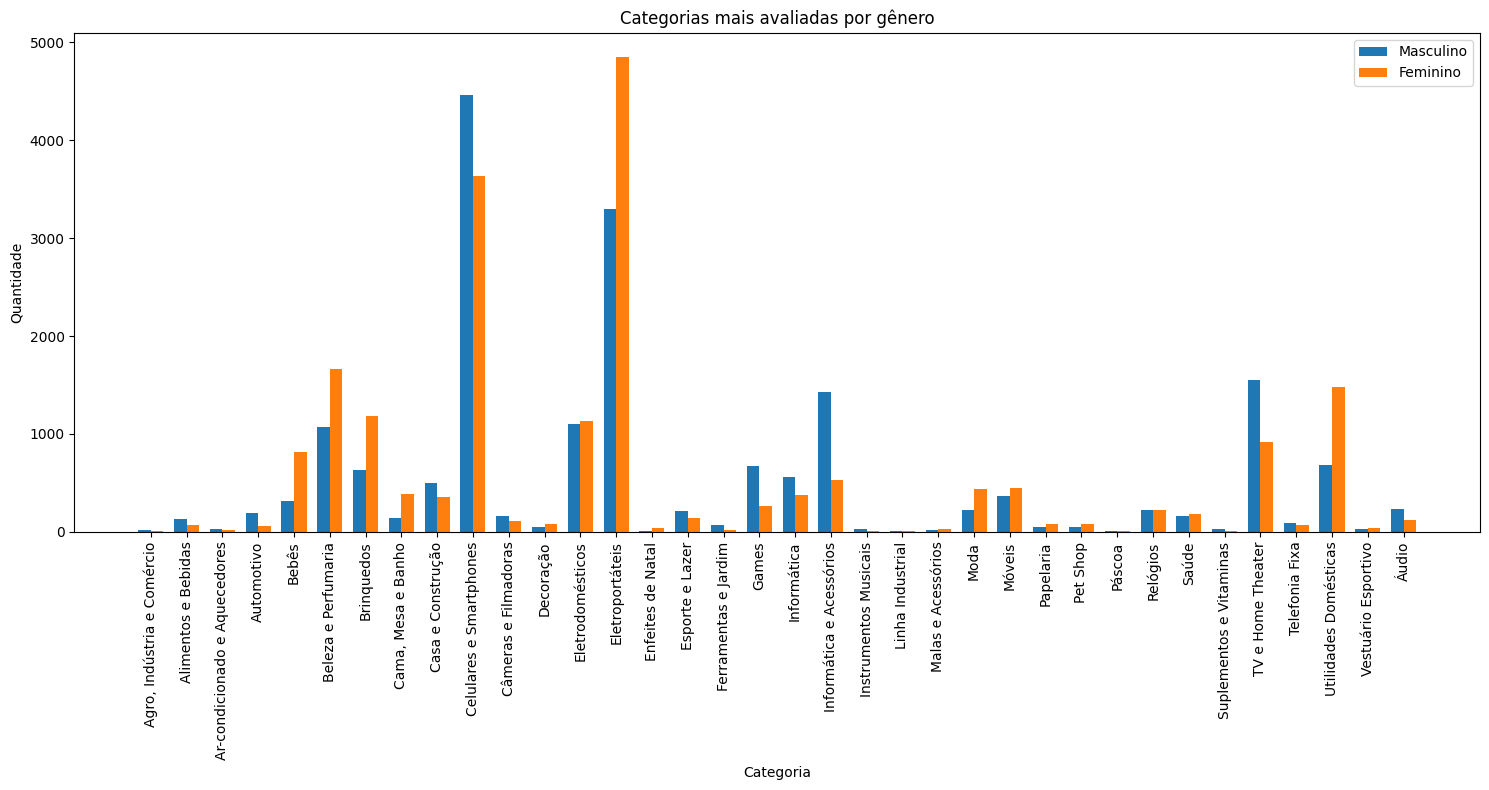

In [ ]:
query_male = """
SELECT p.categoria, COUNT(*) as count
FROM t_fact t
JOIN produto p ON t.produto_id = p.id
JOIN usuario u ON t.usuario_id = u.id
WHERE u.genero = 'M'
GROUP BY p.categoria
"""

query_female = """
SELECT p.categoria, COUNT(*) as count
FROM t_fact t
JOIN produto p ON t.produto_id = p.id
JOIN usuario u ON t.usuario_id = u.id
WHERE u.genero = 'F'
GROUP BY p.categoria
"""

df_male = pd.read_sql_query(query_male, conn)
df_female = pd.read_sql_query(query_female, conn)

# Combina os data frames
df_combined = pd.merge(df_male, df_female, on='categoria', suffixes=('_Male', '_Female'))

# Cria um gráfico de barras lado-a-lado
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.35
bar_positions = range(len(df_combined))

ax.bar(bar_positions, df_combined['count_Male'], width=bar_width, label='Masculino', align='center')
ax.bar([pos + bar_width for pos in bar_positions], df_combined['count_Female'], width=bar_width, label='Feminino', align='center')

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(df_combined['categoria'], rotation=90)

ax.set_title('Categorias mais avaliadas por gênero')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantidade')
ax.legend()

plt.tight_layout()

# 6. Show the combined bar chart
plt.show()

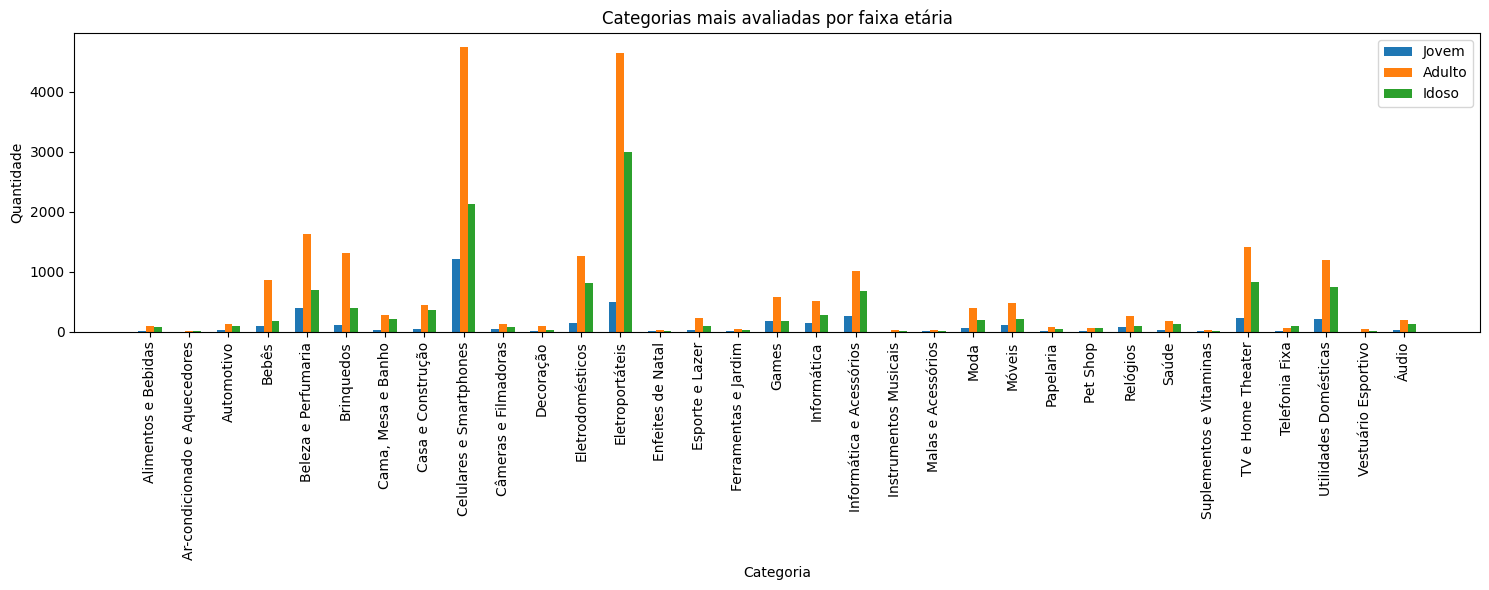

In [ ]:
query_jovem = """
SELECT p.categoria, COUNT(*) as count
FROM t_fact t
JOIN produto p ON t.produto_id = p.id
JOIN usuario u ON t.usuario_id = u.id
WHERE u.faixa_etaria = 'jovem'
GROUP BY p.categoria
"""

query_adulto = """
SELECT p.categoria, COUNT(*) as count
FROM t_fact t
JOIN produto p ON t.produto_id = p.id
JOIN usuario u ON t.usuario_id = u.id
WHERE u.faixa_etaria = 'adulto'
GROUP BY p.categoria
"""

query_idoso = """
SELECT p.categoria, COUNT(*) as count
FROM t_fact t
JOIN produto p ON t.produto_id = p.id
JOIN usuario u ON t.usuario_id = u.id
WHERE u.faixa_etaria = 'idoso'
GROUP BY p.categoria
"""

df_jovem = pd.read_sql_query(query_jovem, conn)
df_jovem = df_jovem.rename(columns={'count': 'count_Jovem'})
df_adulto = pd.read_sql_query(query_adulto, conn)
df_adulto = df_adulto.rename(columns={'count': 'count_Adulto'})
df_idoso = pd.read_sql_query(query_idoso, conn)
df_idoso = df_idoso.rename(columns={'count': 'count_Idoso'})

# Combina os data frames
df_combined = pd.merge(df_jovem, df_adulto, on='categoria')
df_combined = pd.merge(df_combined, df_idoso, on='categoria')

# Cria um gráfico de barras lado-a-lado
fig, ax = plt.subplots(figsize=(15, 6))

bar_width = 0.2
bar_positions = range(len(df_combined))

ax.bar(bar_positions, df_combined['count_Jovem'], width=bar_width, label='Jovem', align='center')
ax.bar([pos + bar_width for pos in bar_positions], df_combined['count_Adulto'], width=bar_width, label='Adulto', align='center')
ax.bar([pos + 2 * bar_width for pos in bar_positions], df_combined['count_Idoso'], width=bar_width, label='Idoso', align='center')

ax.set_xticks([pos + bar_width for pos in bar_positions])
ax.set_xticklabels(df_combined['categoria'], rotation=90)

ax.set_title('Categorias mais avaliadas por faixa etária')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantidade')
ax.legend()

plt.tight_layout()

# 6. Show the combined bar chart
plt.show()

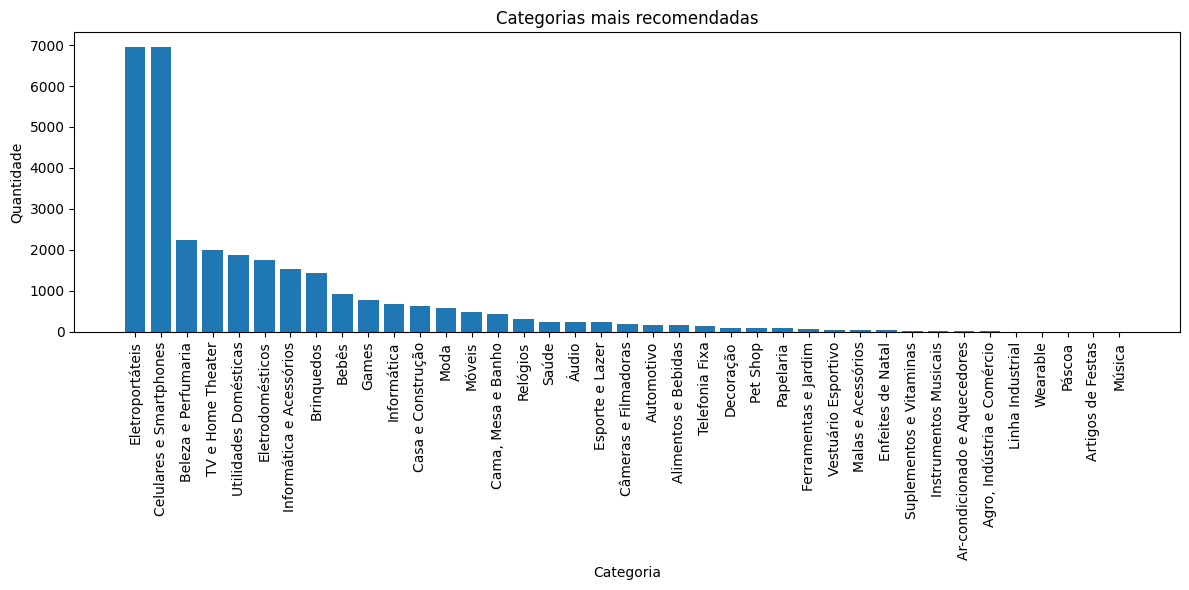

In [ ]:
query = """
SELECT produto.categoria, COUNT(*) as recommended_count
FROM t_fact
INNER JOIN produto ON t_fact.produto_id = produto.id
WHERE t_fact.recomenda = 'Yes'
GROUP BY produto.categoria
ORDER BY recommended_count DESC
"""

# 3. Use Pandas to create a DataFrame from the query results
df = pd.read_sql_query(query, conn)

# 4. Sort the DataFrame by the count of recommended products in descending order
df = df.sort_values(by='recommended_count', ascending=False)

# bar_plot(size=(17, 9), x_column='categoria', y_column='recommended_count', dataframe=df, title='Categorias mais recomendadas')

# 5. Create a bar chart to visualize the most recommended categories
plt.figure(figsize=(12, 6))
plt.bar(df['categoria'], df['recommended_count'])
plt.title('Categorias mais recomendadas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()

# Show the bar chart
plt.show()

### End connection

In [ ]:
cursor.close()
conn.close()